# Advanced Analytics

### Prepping data for analysis

In [144]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [145]:
# Read all the CSV files in the directory
data_dir = '../data'
all_files = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.endswith('.csv')]
df_list = [pd.read_csv(f) for f in all_files]
data = pd.concat(df_list, ignore_index=True)
# Sort by datatimestamp
data = data.sort_values(by='Date').reset_index(drop=True)
# Display the first few rows of the combined dataframe
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,year_month
0,2004-01-04,0:00:00,1.6,1143.0,106.0,6.3,825.0,96.0,986.0,86.0,1477.0,978.0,12.0,61.6,0.8593,2004-01
1,2004-01-04,22:00:00,2.0,1186.0,188.0,9.9,976.0,127.0,844.0,113.0,1570.0,1200.0,15.8,48.0,0.8569,2004-01
2,2004-01-04,21:00:00,2.5,1192.0,254.0,10.8,1007.0,154.0,827.0,124.0,1604.0,1223.0,16.8,44.0,0.8341,2004-01
3,2004-01-04,20:00:00,4.9,1536.0,655.0,20.2,1302.0,269.0,666.0,161.0,1922.0,1599.0,18.3,40.9,0.8493,2004-01
4,2004-01-04,19:00:00,5.5,1592.0,840.0,25.0,1429.0,267.0,624.0,164.0,2089.0,1644.0,20.8,36.7,0.8878,2004-01


In [146]:
# Handle NaN values
data.fillna(data.mean(), inplace=True)

/var/folders/h6/93p_2snd3bl3v008snqlzq7m0000gn/T/ipykernel_21111/3925771505.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


### Autocorrelation and Partial Autocorrelation

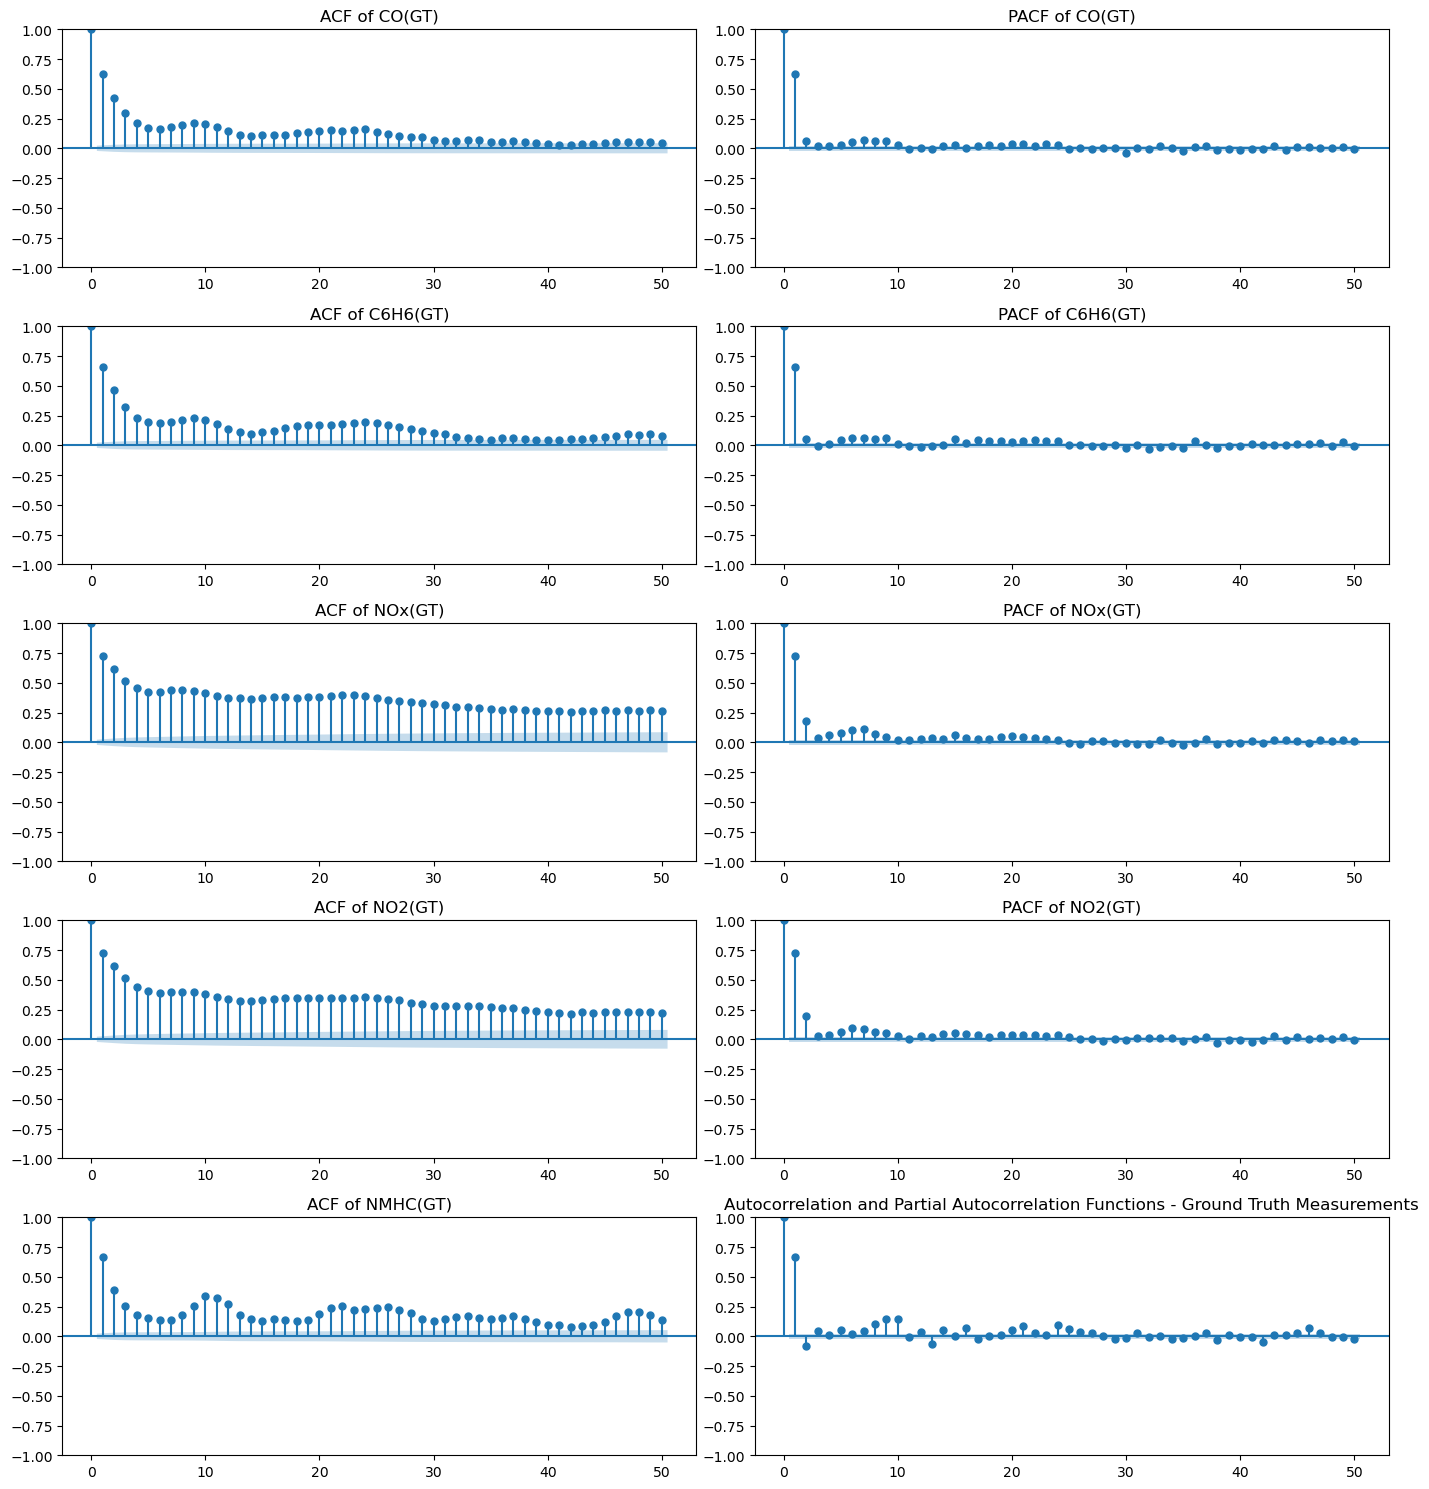

In [147]:
# Autocorrelation and partial autocorrelation function analysis for temporal dependencies
cols_to_analyze = ['CO(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)', 'NMHC(GT)']
fig, axes = plt.subplots(len(cols_to_analyze), 2, figsize=(14, 3 * len(cols_to_analyze)))

for i, col in enumerate(cols_to_analyze):
    plot_acf(data[col], ax=axes[i, 0], lags=50)
    axes[i, 0].set_title(f'ACF of {col}')
    plot_pacf(data[col], ax=axes[i, 1], lags=50)
    axes[i, 1].set_title(f'PACF of {col}')

plt.title('Autocorrelation and Partial Autocorrelation Functions - Ground Truth Measurements')
plt.tight_layout()
plt.show()

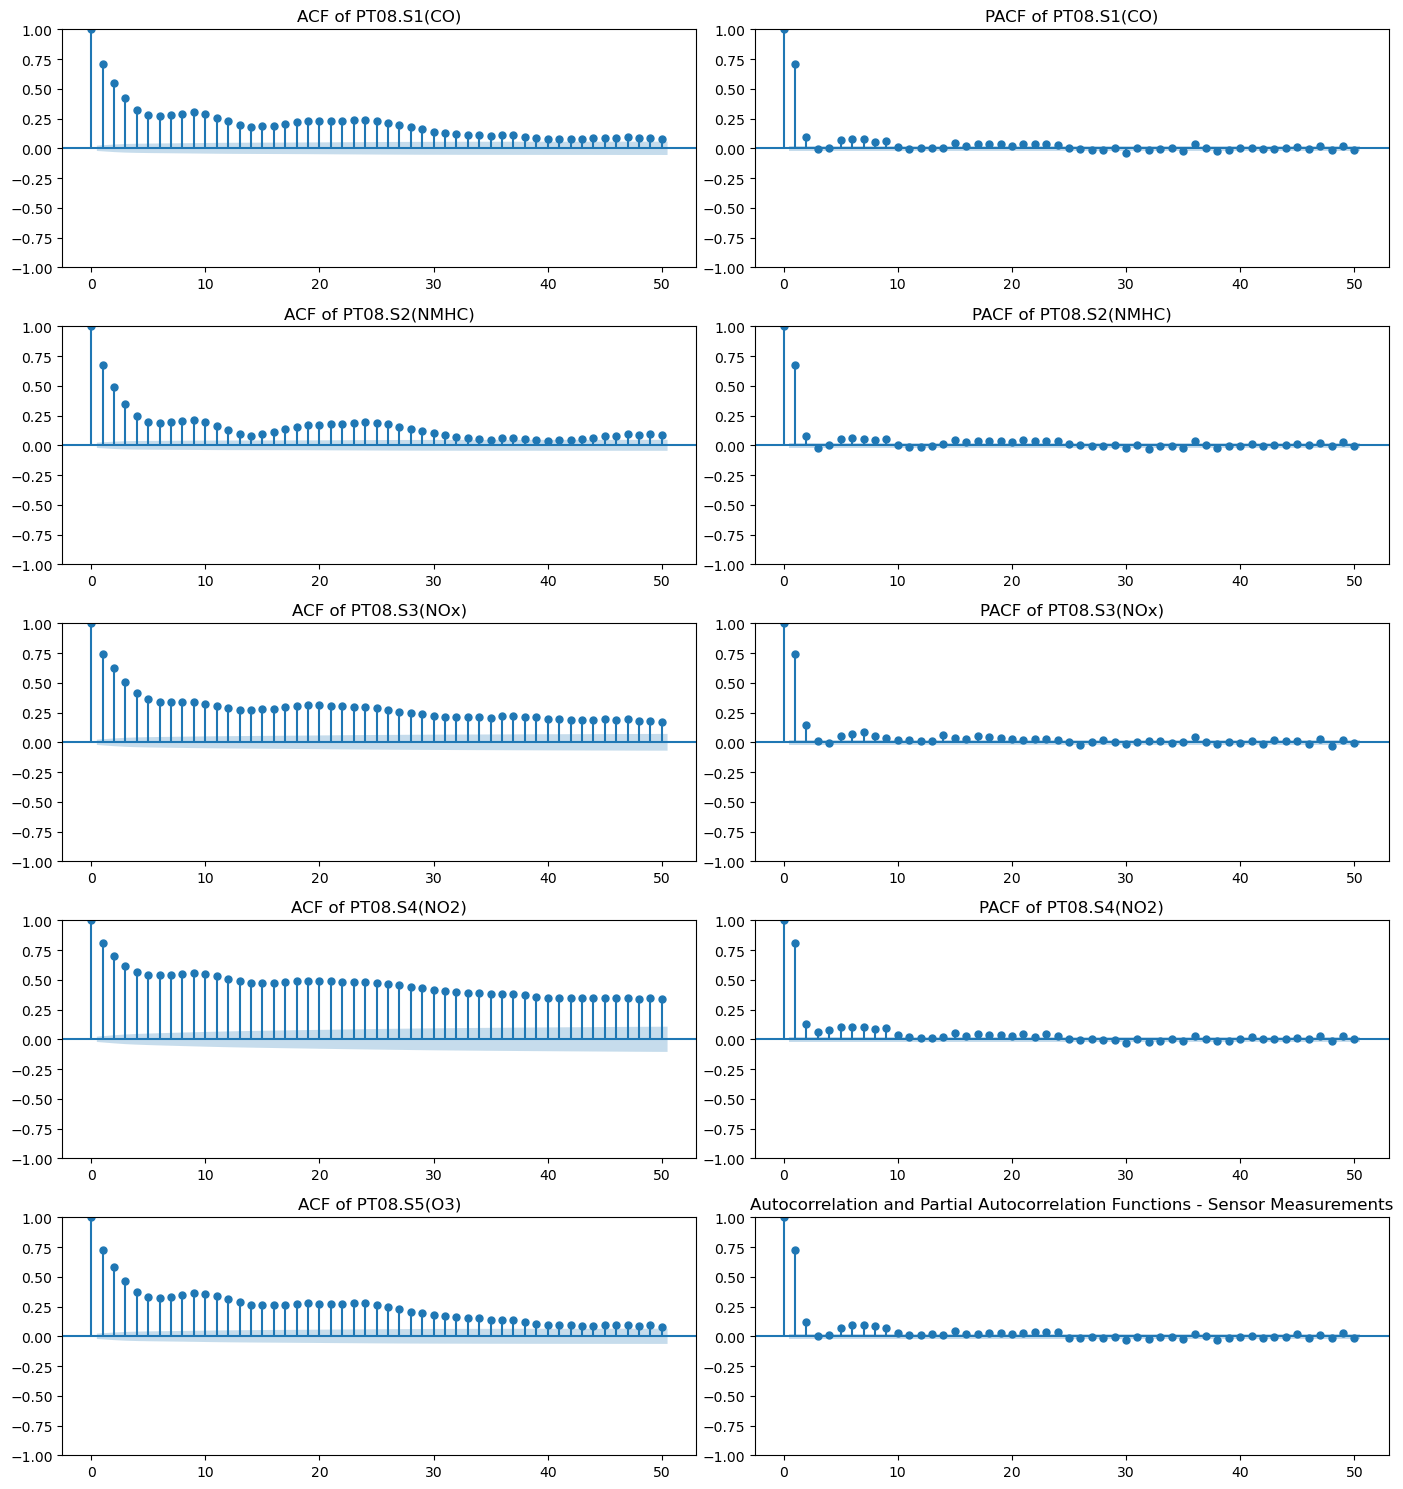

In [148]:
# Autocorrelation and partial autocorrelation function analysis for temporal dependencies
cols_to_analyze = ['PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)']
fig, axes = plt.subplots(len(cols_to_analyze), 2, figsize=(14, 3 * len(cols_to_analyze)))

for i, col in enumerate(cols_to_analyze):
    plot_acf(data[col], ax=axes[i, 0], lags=50)
    axes[i, 0].set_title(f'ACF of {col}')
    plot_pacf(data[col], ax=axes[i, 1], lags=50)
    axes[i, 1].set_title(f'PACF of {col}')

plt.title('Autocorrelation and Partial Autocorrelation Functions - Sensor Measurements')
plt.tight_layout()
plt.show()

### Decomposition Analysis

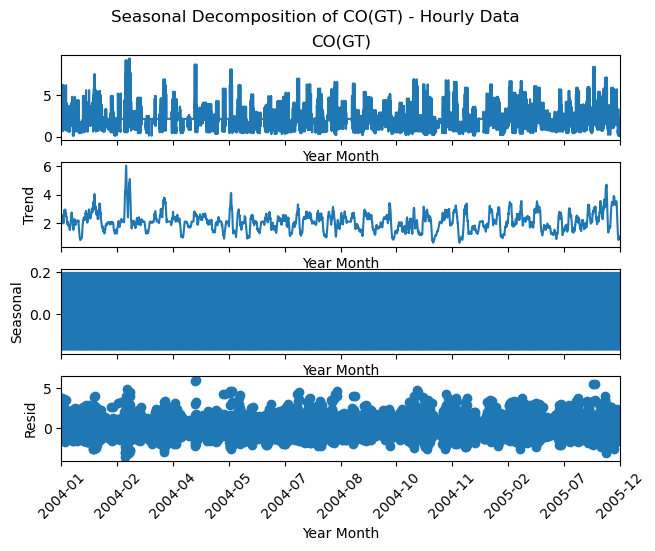

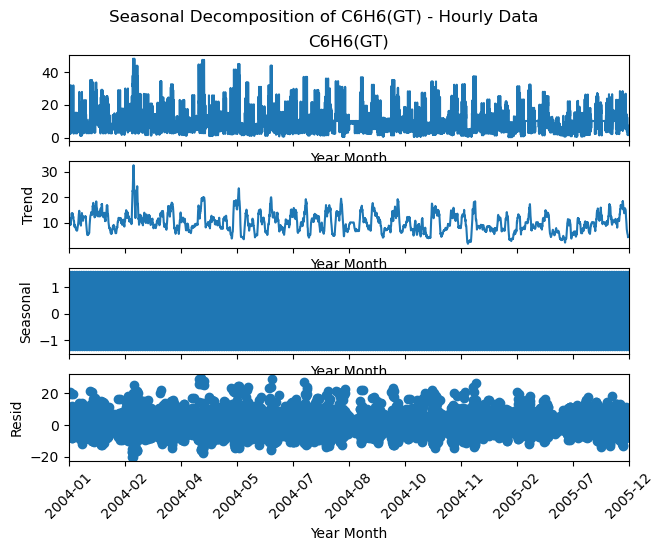

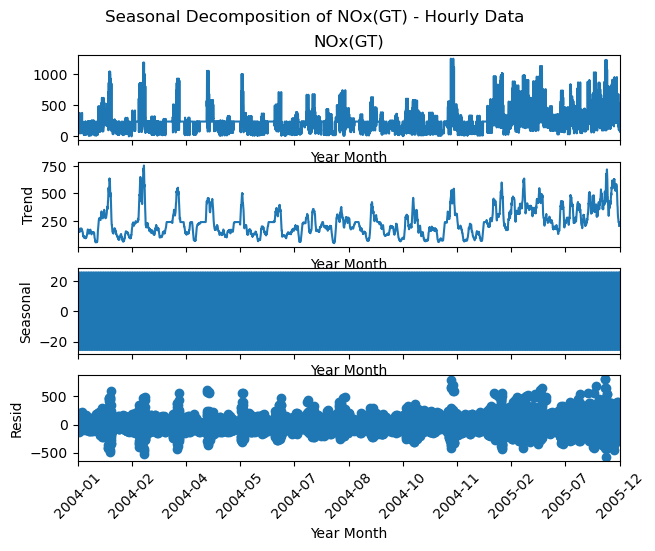

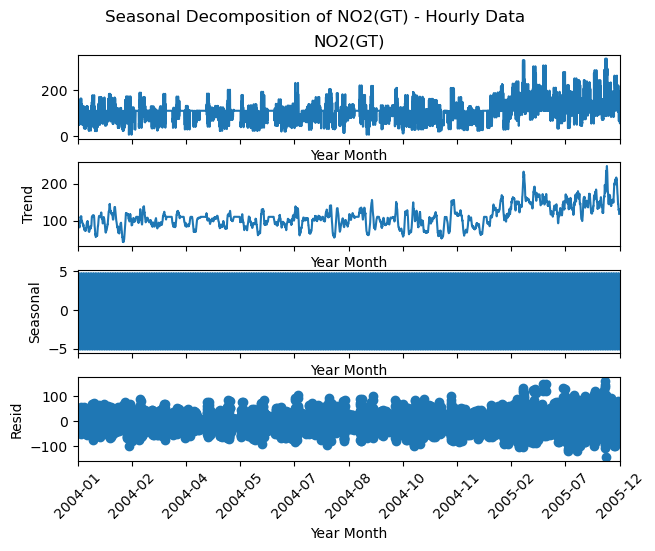

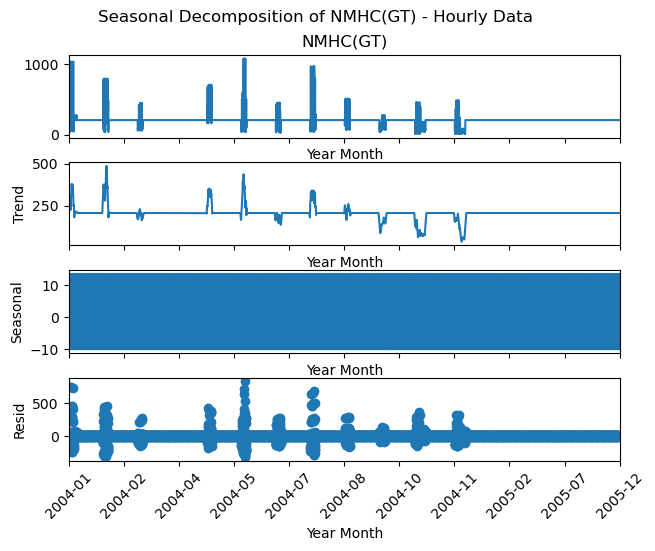

In [149]:
# Decomposition Analysis: Time series decomposition into trend, seasonal, and residual components
# For ground truth measurements
cols_to_analyze = ['CO(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)', 'NMHC(GT)']

for col in cols_to_analyze:
    result = seasonal_decompose(data[col], model='additive', period=24) # using hourly data
    fig = result.plot()
    plt.suptitle(f'Seasonal Decomposition of {col} - Hourly Data', y=1.02)
    for ax in fig.axes:
        ax.set_xlabel('Year Month')
        ax.set_xticks(range(0, len(data['year_month']), max(1, len(data['year_month']) // 10)))
        ax.set_xticklabels(data['year_month'][::max(1, len(data['year_month']) // 10)], rotation=45)
    plt.show()

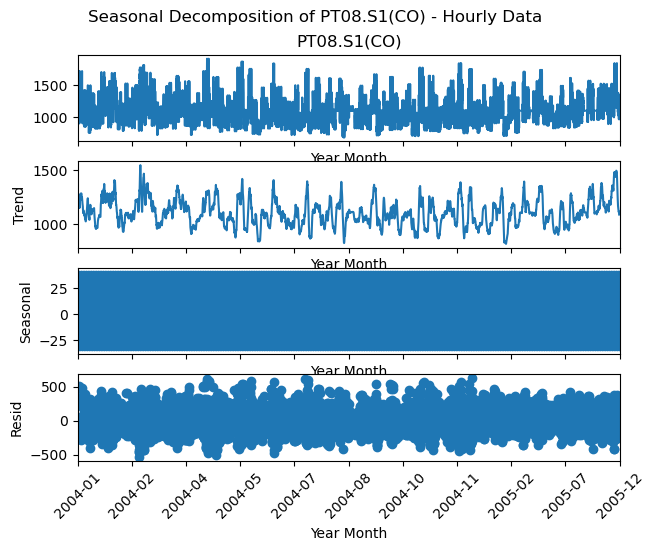

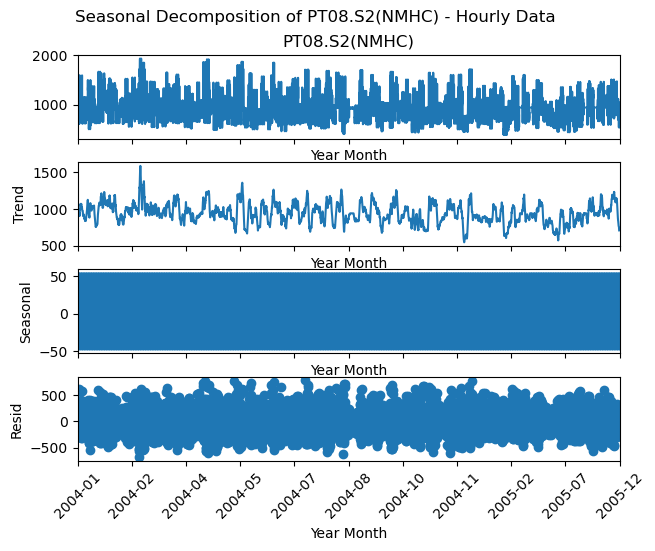

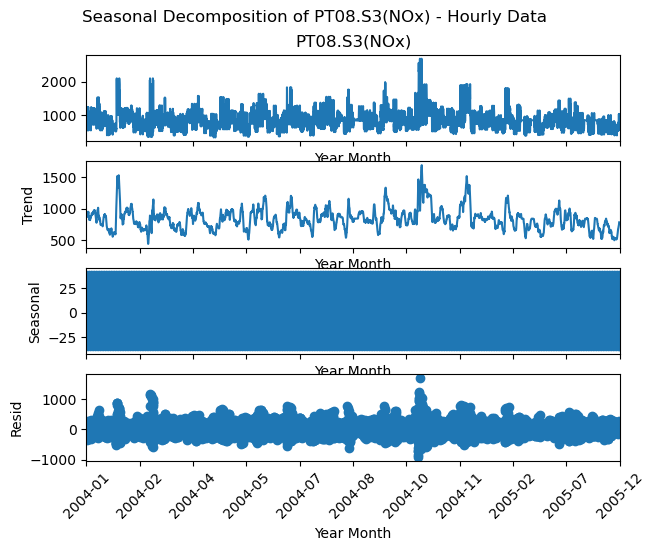

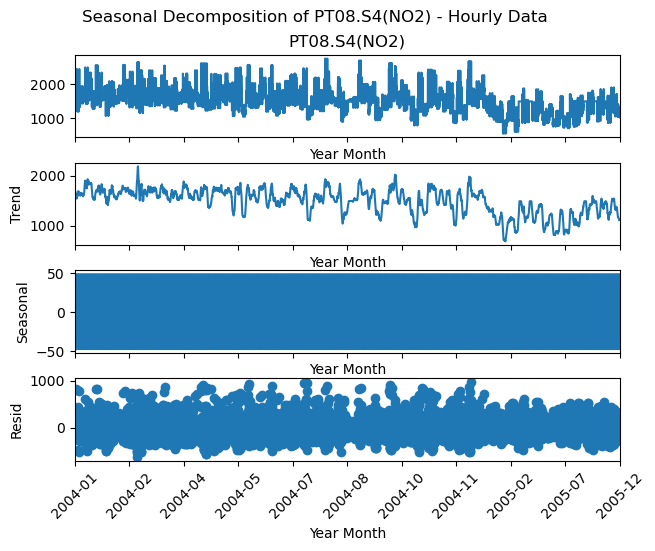

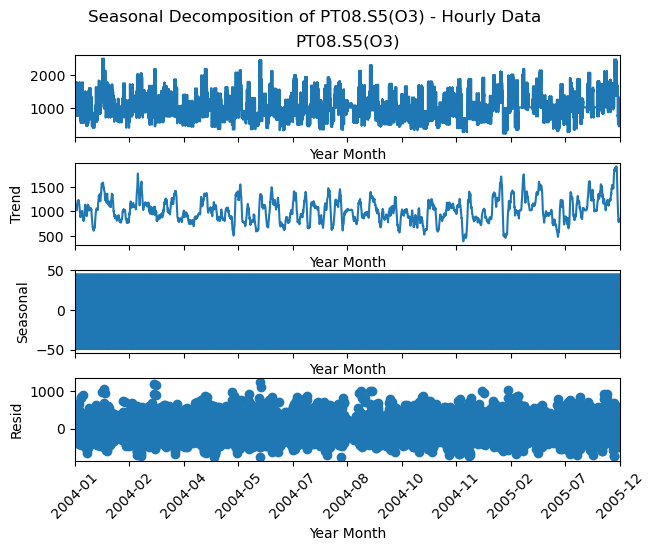

In [150]:
# Decomposition Analysis: Time series decomposition into trend, seasonal, and residual components
# For sensor measurements
cols_to_analyze = ['PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)']

for col in cols_to_analyze:
    result = seasonal_decompose(data[col], model='additive', period=24) # using hourly data
    fig = result.plot()
    plt.suptitle(f'Seasonal Decomposition of {col} - Hourly Data', y=1.02)
    for ax in fig.axes:
        ax.set_xlabel('Year Month')
        ax.set_xticks(range(0, len(data['year_month']), max(1, len(data['year_month']) // 10)))
        ax.set_xticklabels(data['year_month'][::max(1, len(data['year_month']) // 10)], rotation=45)
    plt.show()

### Anomaly Detection

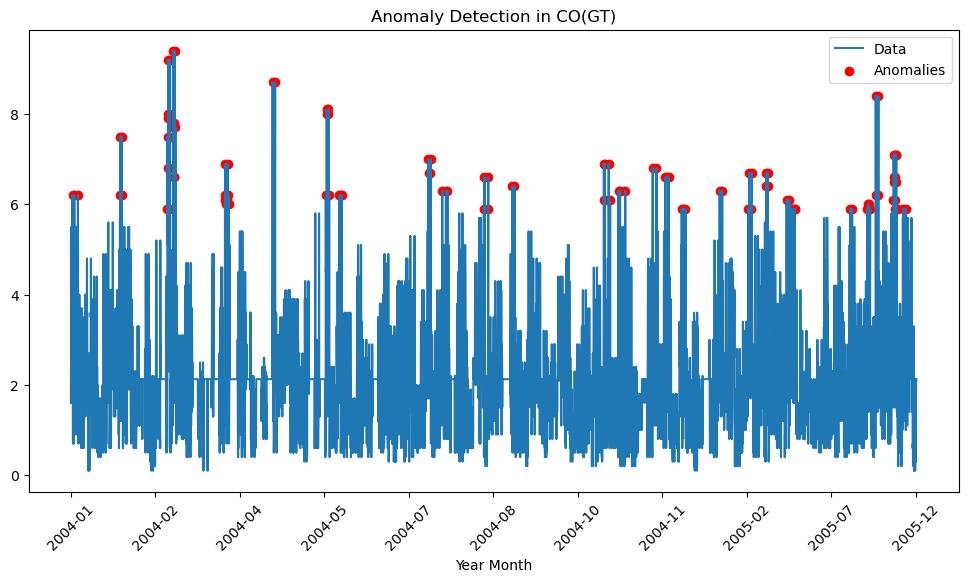

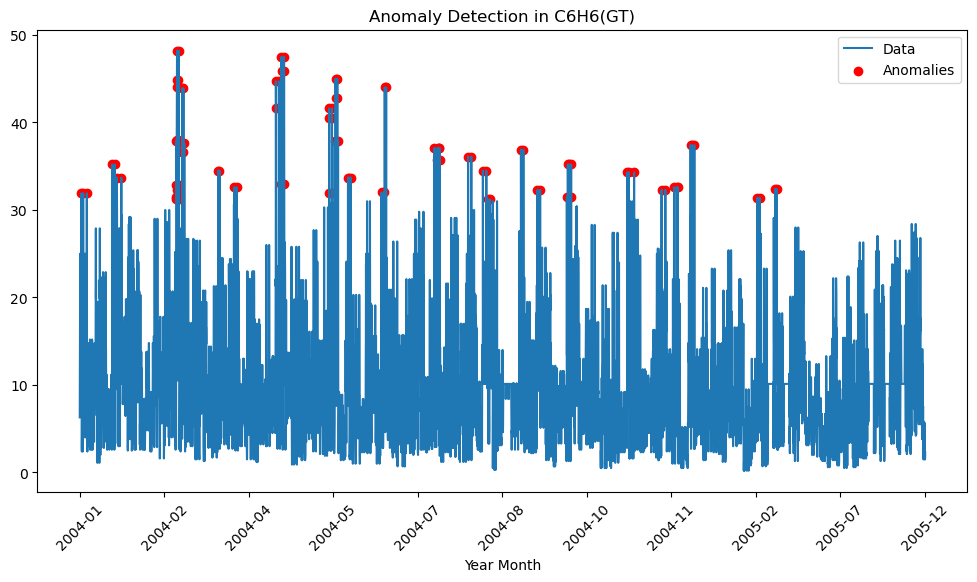

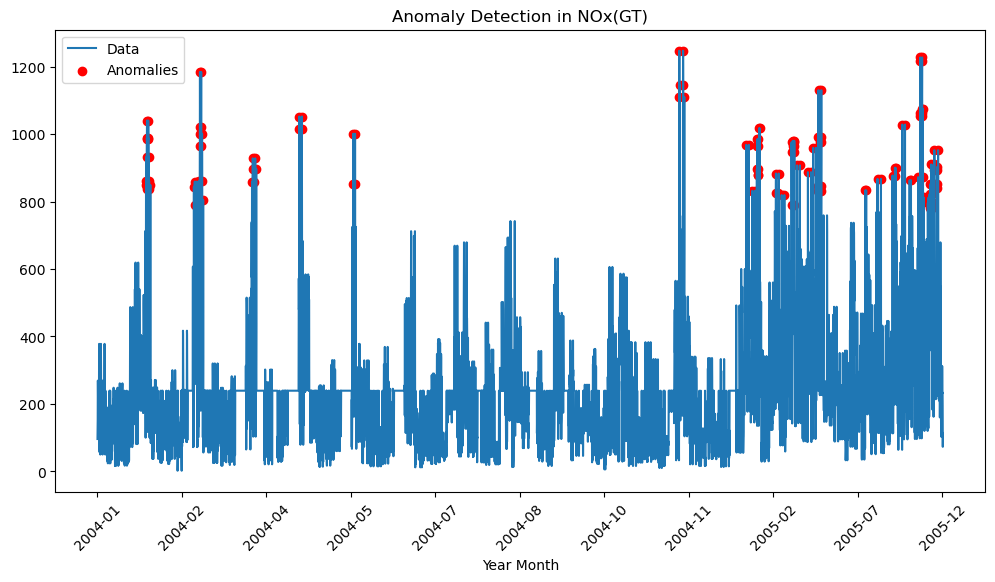

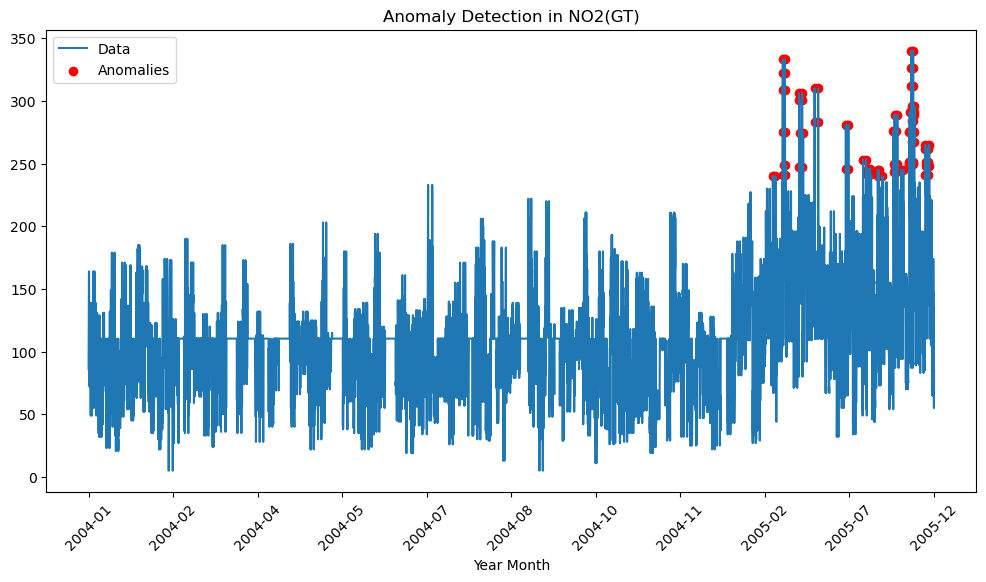

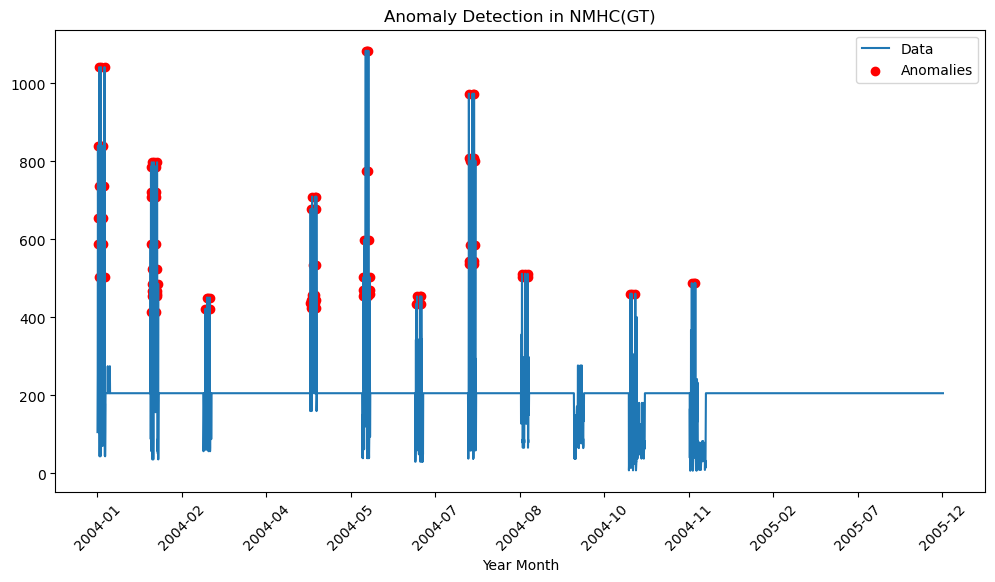

In [151]:
# Anomaly Detection
# for ground truth measurements
cols_to_analyze = ['CO(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)', 'NMHC(GT)']
for col in cols_to_analyze:
    mean = data[col].mean()
    std = data[col].std()
    threshold = 3 * std
    anomalies = data[np.abs(data[col] - mean) > threshold]
    
    plt.figure(figsize=(12, 6))
    plt.plot(data[col], label='Data')
    plt.scatter(anomalies.index, anomalies[col], color='red', label='Anomalies')
    plt.title(f'Anomaly Detection in {col}')
    plt.legend()
    for ax in plt.gcf().axes:
        ax.set_xlabel('Year Month')
        ax.set_xticks(range(0, len(data['year_month']), max(1, len(data['year_month']) // 10)))
        ax.set_xticklabels(data['year_month'][::max(1, len(data['year_month']) // 10)], rotation=45)
    plt.show()

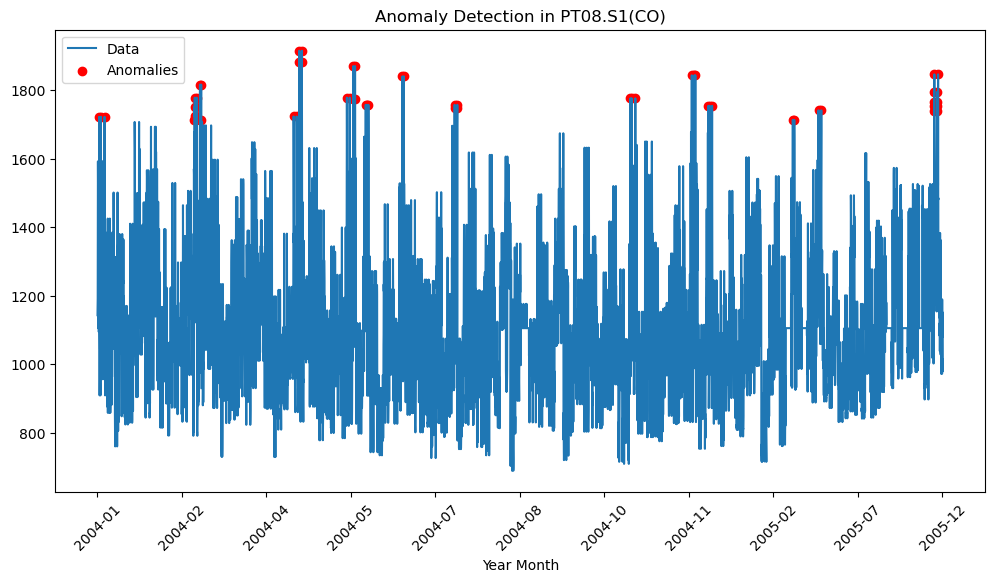

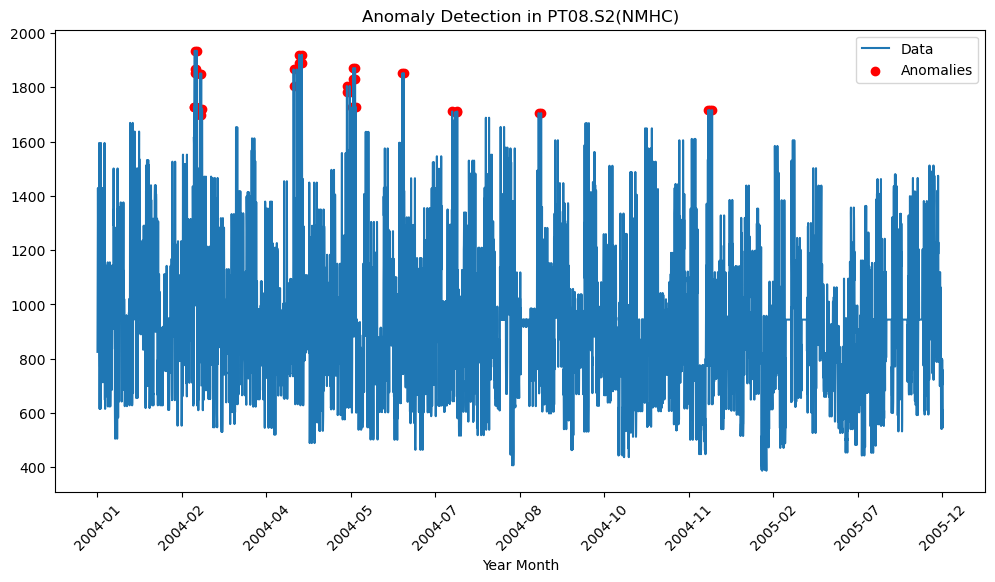

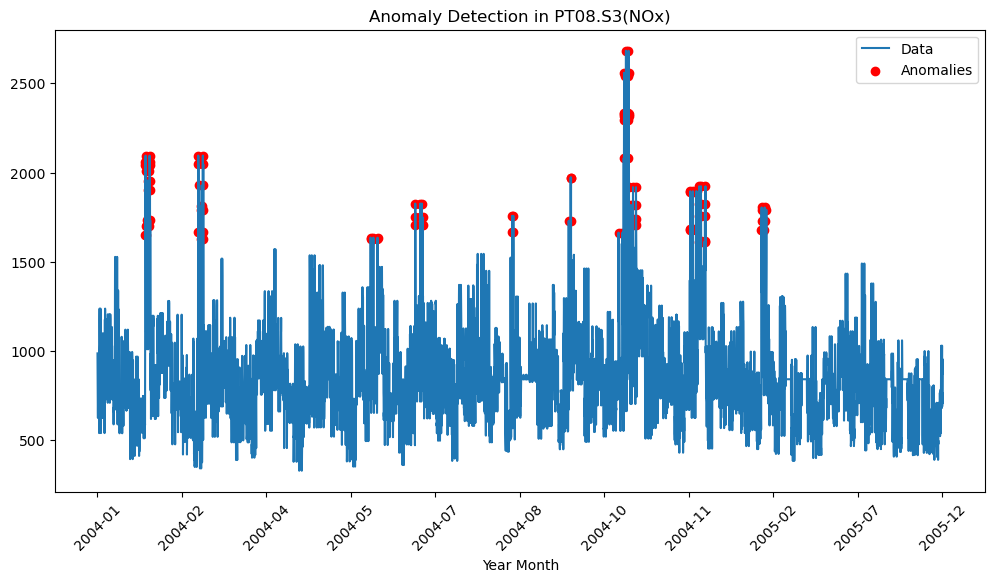

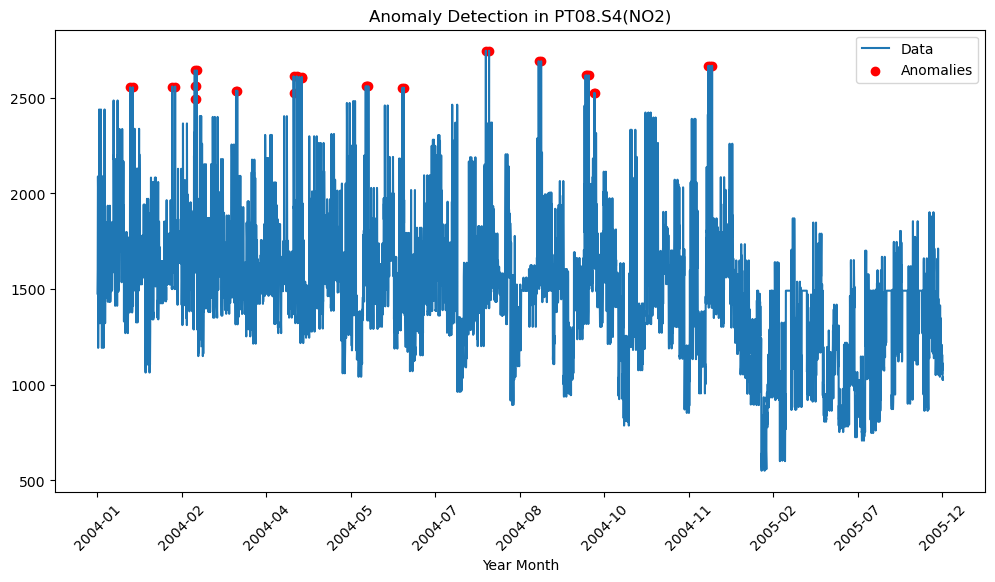

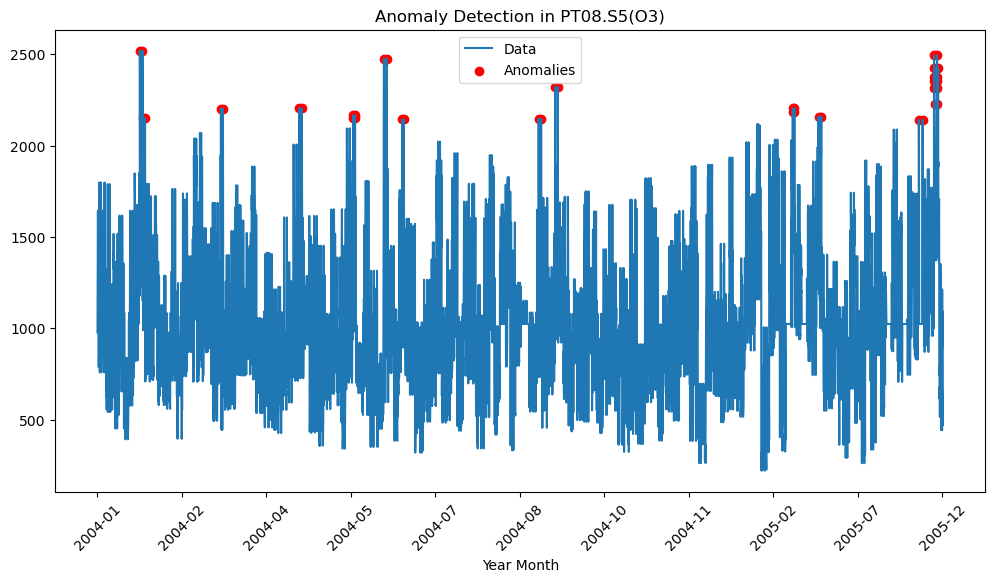

In [152]:
# Anomaly Detection
# for sensor measurements
cols_to_analyze = ['PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)']
for col in cols_to_analyze:
    mean = data[col].mean()
    std = data[col].std()
    threshold = 3 * std
    anomalies = data[np.abs(data[col] - mean) > threshold]
    
    plt.figure(figsize=(12, 6))
    plt.plot(data[col], label='Data')
    plt.scatter(anomalies.index, anomalies[col], color='red', label='Anomalies')
    for ax in plt.gcf().axes:
        ax.set_xlabel('Year Month')
        ax.set_xticks(range(0, len(data['year_month']), max(1, len(data['year_month']) // 10)))
        ax.set_xticklabels(data['year_month'][::max(1, len(data['year_month']) // 10)], rotation=45)
    plt.title(f'Anomaly Detection in {col}')
    plt.legend()
    plt.show()